<a href="https://colab.research.google.com/github/djdunc/housemill/blob/master/data/flood-event-plots.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

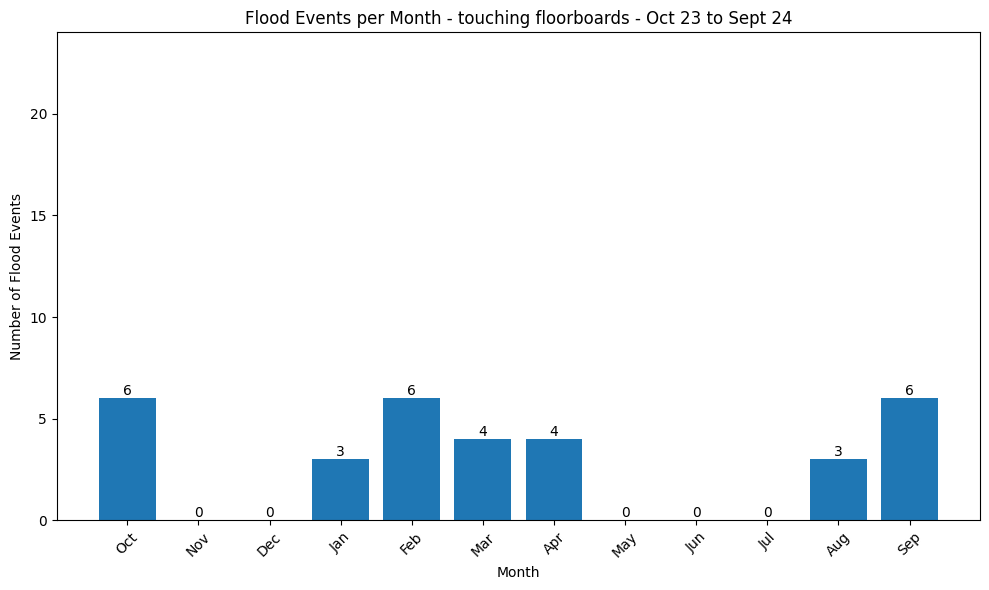

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import calendar

# Load your data
df = pd.read_csv('/content/32-flooding-high-tides.csv')
#df = pd.read_csv('/content/109-flooding-high-tides-touching-floorboard.csv')


# Convert 'Time' to datetime
df['Time'] = pd.to_datetime(df['Time'])

# --- Manual Start and End Date Setting ---
start_month = 10  # October
start_year = 2023
end_month = 9  # September
end_year = 2024
# ----------------------------------------

start_date = pd.to_datetime(f"{start_year}-{start_month}-01")
end_date = pd.to_datetime(f"{end_year}-{end_month}-01") + pd.tseries.offsets.MonthEnd(0)

# Create date range
dates = pd.date_range(start=start_date, end=end_date, freq='MS')

# Create DataFrame with all months
all_months = pd.DataFrame({'Time': dates})

# Extract year and month for all_months
all_months['Year'] = all_months['Time'].dt.year
all_months['Month'] = all_months['Time'].dt.month
all_months['MonthAbbrev'] = all_months['Month'].apply(lambda x: calendar.month_abbr[x])


# Extract year and month for df
df['Year'] = df['Time'].dt.year
df['Month'] = df['Time'].dt.month

# Group and count flood events
flood_counts = df.groupby(['Year', 'Month']).size().reset_index(name='Flood Count')

# Merge DataFrames
flood_counts = pd.merge(all_months, flood_counts, on=['Year', 'Month'], how='left').fillna(0)


# Plotting
plt.figure(figsize=(10, 6))
bars = plt.bar(flood_counts['MonthAbbrev'], flood_counts['Flood Count'])  # Store the bar objects

# Add count labels on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, str(int(yval)), va='bottom', ha='center')  # va for vertical alignment, ha for horizontal

plt.xlabel("Month")
plt.ylabel("Number of Flood Events")
plt.title("Flood Events per Month - touching floorboards - Oct 23 to Sept 24")
plt.xticks(rotation=45)
plt.ylim(0, 24)
plt.tight_layout()
plt.show()